In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
%matplotlib inline

In [20]:
housing=fetch_california_housing()

In [21]:
dir(housing)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [22]:
X = pd.DataFrame(housing.data, columns=housing.feature_names)

In [23]:
y=pd.DataFrame(housing.target, columns=housing.target_names)

In [24]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [25]:
y.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
## standardizing the dataset
from sklearn.preprocessing import StandardScaler #in linear regression gradient descent is formed, for good results Standardization is important
scaler=StandardScaler()  #Mean=0 and standard deviation=1
X_train=scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [28]:
X_train

array([[ 0.13350629,  0.50935748,  0.18106017, ..., -0.01082519,
        -0.80568191,  0.78093406],
       [-0.53221805, -0.67987313, -0.42262953, ..., -0.08931585,
        -1.33947268,  1.24526986],
       [ 0.1709897 , -0.36274497,  0.07312833, ..., -0.04480037,
        -0.49664515, -0.27755183],
       ...,
       [-0.49478713,  0.58863952, -0.59156984, ...,  0.01720102,
        -0.75885816,  0.60119118],
       [ 0.96717102, -1.07628333,  0.39014889, ...,  0.00482125,
         0.90338501, -1.18625198],
       [-0.68320166,  1.85715216, -0.82965604, ..., -0.0816717 ,
         0.99235014, -1.41592345]])

In [29]:
X_test

array([[-1.1526893 , -0.28346293, -0.50781822, ...,  0.06127763,
         0.19166399,  0.28664112],
       [-0.70640568,  0.11294728, -0.16252032, ..., -0.03551561,
        -0.23911452,  0.06196251],
       [-0.20830675,  1.85715216, -0.59546738, ..., -0.14215427,
         1.00639726, -1.42590916],
       ...,
       [-0.19155996, -0.99700129, -0.6830438 , ..., -0.06058827,
        -0.92742367,  0.8358555 ],
       [-0.11911302, -1.47269353,  0.02607207, ...,  0.03461374,
         1.01576201, -0.84673764],
       [-0.43304974, -0.91771925, -0.84872893, ..., -0.0407528 ,
        -0.70266966,  0.67109119]])

In [30]:
from sklearn.linear_model import LinearRegression  
#cross validation
from sklearn.model_selection import cross_val_score
regression=LinearRegression()
regression.fit(X_train, y_train)
mse=cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error',cv=10)


In [31]:
np.mean(mse)

-0.5257104326777

In [32]:
y_pred=regression.predict(X_test)
y_pred

array([[0.72604907],
       [1.76743383],
       [2.71092161],
       ...,
       [2.07465531],
       [1.57371395],
       [1.82744133]])

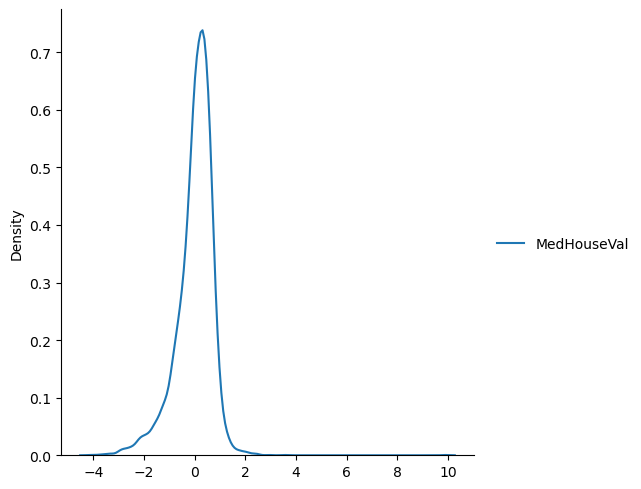

In [36]:
import seaborn as sns
sns.displot(y_pred-y_test,kind='kde')

In [37]:
from sklearn.metrics import r2_score
score=r2_score(y_pred,y_test)

In [38]:
score

0.3451339380943985